In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt

In [10]:
# Load JSON data from a file
with open('metro_time_between_stations.json', 'r') as file:
    data = json.load(file)
    
    

In [4]:
# Create a directed graph
graph = nx.DiGraph()


In [21]:
def clean_time_value(time):
    if ',' in time:
        time = time.replace(',', '.')

    return time
    

In [22]:
# Add edges to the graph
for entry in data:
    id_st1 = entry['id_st1']
    id_st2 = entry['id_st2']
    time = float(clean_time_value(entry['time']))
    graph.add_edge(id_st1, id_st2, weight=time)


In [23]:
# Optionally, you can print the edges to verify
print("Graph edges with weights:")
for u, v, weight in graph.edges(data='weight'):
    print(f"({u}, {v}, {weight})")


Graph edges with weights:
(1, 2, 2.0)
(2, 3, 4.0)
(3, 4, 3.0)
(4, 5, 2.0)
(5, 6, 2.0)
(6, 7, 2.0)
(7, 8, 1.3)
(8, 9, 1.5)
(9, 10, 1.4)
(10, 11, 1.4)
(11, 12, 1.3)
(12, 13, 2.1)
(13, 14, 2.1)
(14, 15, 1.4)
(15, 16, 2.4)
(16, 17, 3.2)
(17, 18, 2.5)
(18, 19, 2.3)
(19, 20, 3.2)
(20, 21, 3.0)
(21, 22, 2.2)
(22, 266, 4.0)
(266, 267, 2.0)
(267, 268, 3.0)
(268, 269, 2.0)
(244, 260, 2.0)
(260, 23, 2.0)
(23, 24, 2.2)
(24, 25, 3.2)
(25, 26, 2.4)
(26, 27, 2.0)
(27, 28, 3.0)
(28, 29, 3.0)
(29, 30, 1.5)
(30, 31, 1.5)
(31, 32, 2.0)
(32, 33, 3.0)
(33, 34, 2.0)
(34, 35, 3.0)
(35, 36, 3.0)
(36, 37, 3.0)
(37, 38, 4.0)
(38, 39, 3.0)
(39, 40, 2.0)
(40, 41, 3.0)
(41, 42, 2.0)
(42, 43, 3.0)
(43, 44, 4.0)
(45, 46, 2.0)
(46, 47, 2.0)
(47, 48, 1.4)
(48, 49, 3.3)
(49, 50, 7.3)
(50, 51, 2.5)
(51, 52, 2.5)
(52, 53, 2.2)
(53, 54, 3.5)
(54, 55, 4.15)
(55, 56, 1.5)
(56, 57, 2.3)
(57, 58, 2.0)
(58, 59, 3.0)
(59, 60, 3.0)
(60, 61, 3.0)
(61, 62, 2.0)
(62, 63, 3.0)
(63, 64, 3.0)
(64, 65, 3.0)
(65, 66, 2.0)
(67, 68, 2.0)


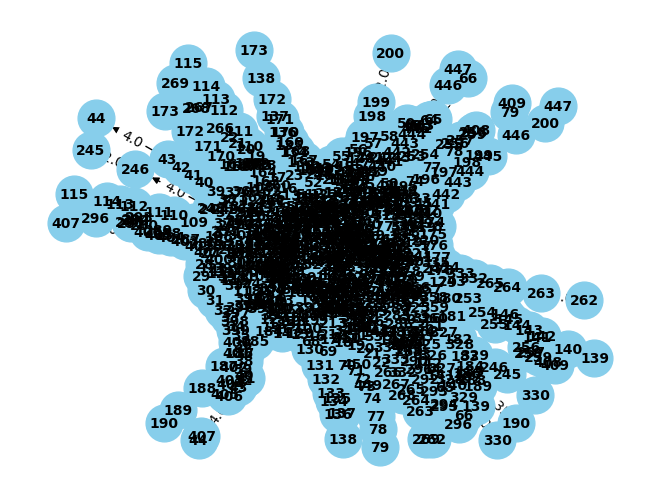

In [25]:
# Draw the graph
pos = nx.spring_layout(graph)
labels = nx.get_edge_attributes(graph, 'weight')
nx.draw(graph, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)
nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)

plt.show()